In [30]:
import numpy as np
import pickle
import os
import tensorflow as tf
import download
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#from dataset import one_hot_encoded

In [31]:
data_path = "/Users/DEEPAK/Desktop/FALL 2018/EE-258/Project_A_CIFAR-10/cifar-10-python.tar/cifar-10-python"

In [32]:
def get_filenames(data_path):
    filenames = [os.path.join(data_path, 'cifar-10-batches-py', 'data_batch_%d' % i)
    for i in range(1, 6)]
    return filenames

def get_classname(filename=""):
    """
    Return the full path of a data-file for the data-set.

    If filename=="" then return the directory of the files.
    """

    return os.path.join(data_path, "cifar-10-batches-py/", filename)


def get_testfile(data_path):
    testfile = [os.path.join(data_path, 'cifar-10-batches-py', 'test_batch')]
    return testfile
    

                             
def _unpickle(filename):
    """
    Unpickle the given file and return the data.

    Note that the appropriate dir-name is prepended the filename.
    """

    # Create full path for the file.
    file_path = get_classname(filename)

    print("Loading data: " + file_path)

    with open(file_path, mode='rb') as file:
        # In Python 3.X it is important to set the encoding,
        # otherwise an exception is raised here.
        data = pickle.load(file, encoding='bytes')

    return data

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
        data = dict[b'data']
        label = dict[b'labels']
    return dict

In [33]:
def load_class_names():
    """
    Load the names for the classes in the CIFAR-10 data-set.

    Returns a list with the names. Example: names[3] is the name
    associated with class-number 3.
    """

    # Load the class-names from the pickled file.
    raw = _unpickle(filename="batches.meta")[b'label_names']

    # Convert from binary strings.
    names = [x.decode('utf-8') for x in raw]

    return names

In [34]:
load_class_names()

Loading data: /Users/DEEPAK/Desktop/FALL 2018/EE-258/Project_A_CIFAR-10/cifar-10-python.tar/cifar-10-python\cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [35]:
all_labels = []
all_data = []
test_labels = []
test_data = []
num_batch_images = 10000
channels = 3
width = 32
height = 32

In [36]:
for filename in get_filenames('/Users/DEEPAK/Desktop/FALL 2018/EE-258/Project_A_CIFAR-10/cifar-10-python.tar/cifar-10-python'):
    batch_dict = unpickle(filename)
    all_labels.extend(batch_dict[b'labels'])
    all_data.extend(np.reshape(batch_dict[b'data'], (num_batch_images, channels,width,height)))
    
    
for testfile in get_testfile('/Users/DEEPAK/Desktop/FALL 2018/EE-258/Project_A_CIFAR-10/cifar-10-python.tar/cifar-10-python'):
    test_dict = unpickle(filename)
    test_labels.extend(batch_dict[b'labels'])
    test_data.extend(np.reshape(batch_dict[b'data'], (num_batch_images, channels,width,height)))    

In [37]:
train_X = np.asarray(all_data)
train_Y = np.asarray(all_labels)

test_X = np.asarray(test_data)
test_Y = np.asarray(test_labels)

In [38]:
print("Shape of training data:")
print(train_X.shape)
print(train_Y.shape)
print("Shape of test data:")
print(test_X.shape)
print(test_Y.shape)

Shape of training data:
(50000, 3, 32, 32)
(50000,)
Shape of test data:
(10000, 3, 32, 32)
(10000,)


(32, 32, 3)


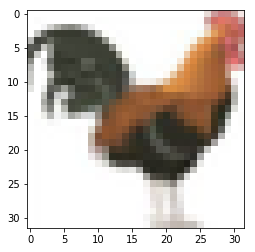

In [39]:
oneimage = all_data[1818].transpose(1, 2, 0)
print(oneimage.shape)
plt.imshow(oneimage)

In [40]:
train_X = np.reshape(train_X,(50000,3072))
test_X = np.reshape(test_X,(10000,3072))
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

# Normalization of pixel values (to [0-1] range)

train_X /= 255
test_X /= 255

In [41]:
train_X.shape

(50000, 3072)

In [42]:
train_Y.shape

(50000,)

In [43]:
import numpy as np
shuffle_index = np.random.permutation(50000)
train_X, train_Y = train_X[shuffle_index], train_Y[shuffle_index]

In [44]:
digit_train, counts_train = np.unique(train_Y, return_counts = True)

distribution_train = dict(zip(digit_train, counts_train))
print(distribution_train )

{0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


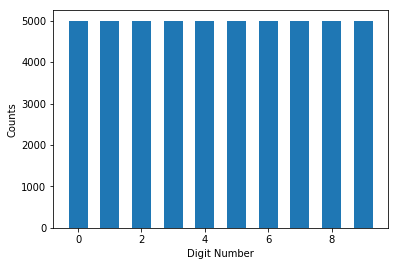

In [45]:
plt.bar(list(distribution_train.keys()),distribution_train.values(),width =0.6)
plt.xlabel('Digit Number')
plt.ylabel('Counts')
plt.show()

In [46]:
digit_test, counts_test = np.unique(test_Y, return_counts = True)

distribution_test = dict(zip(digit_test, counts_test))
print(distribution_test)

{0: 1014, 1: 1014, 2: 952, 3: 1016, 4: 997, 5: 1025, 6: 980, 7: 977, 8: 1003, 9: 1022}


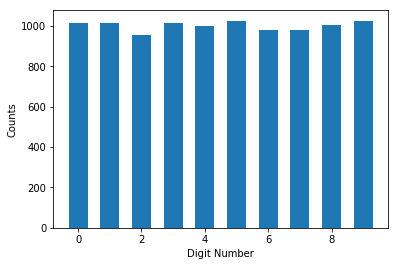

In [47]:
plt.bar(list(distribution_test.keys()),distribution_test.values(),width =0.6)
plt.xlabel('Digit Number')
plt.ylabel('Counts')
plt.show()

In [48]:
train_Xv, X_val, train_Yv, Y_val  = train_test_split(train_X, train_Y, test_size = 1/10, random_state = 42)

In [49]:
print(train_Xv.shape, X_val.shape)
print(train_Yv.shape, Y_val.shape)

(45000, 3072) (5000, 3072)
(45000,) (5000,)


# Quick Examination- performance with unscaled sample.

In [50]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(train_Xv)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[3072], n_classes=10, feature_columns=feature_columns, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # to be compatible with sklearn
dnn_clf.fit(train_Xv, train_Yv, batch_size=450, steps=1000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001BA3DD6E5C0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\DEEPAK\\AppData\\Local\\Temp\\tmpn9lthyxf'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\App

SKCompat()

In [23]:
y_pred = dnn_clf.predict(X_val)
print(y_pred.keys())
accuracy_score(Y_val, y_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmpp2fs_c2x\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
dict_keys(['logits', 'probabilities', 'classes'])


0.44


# Now using feature scaling to get a better result.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_Xv.astype(np.float32))
X_val_scaled = scaler.fit_transform(X_val.astype(np.float32))
X_test_scaled = scaler.fit_transform(test_X.astype(np.float32))

In [25]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[3072], n_classes=10,
                                         feature_columns=feature_columns, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # to be compatible with sklearn
dnn_clf.fit(X_train_scaled, train_Yv, batch_size=450, steps=1000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001BA411BE978>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\DEEPAK\\AppData\\Local\\Temp\\tmpgt2i3omj'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\App

SKCompat()

In [27]:
Nron_opt = 675
config = tf.contrib.learn.RunConfig(tf_random_seed=42)
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled)
dnn_clf_opt = tf.contrib.learn.DNNClassifier(hidden_units=[Nron_opt], n_classes=10,
                                         feature_columns=feature_columns, config=config)
dnn_clf_opt = tf.contrib.learn.SKCompat(dnn_clf_opt) # if TensorFlow >= 1.1
dnn_clf_opt.fit(X_train_scaled, train_Y, batch_size=64, steps=5500)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001BA411BE6D8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\DEEPAK\\AppData\\Local\\Temp\\tmpkvgvxifu'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\DEEPAK\App

SKCompat()

In [29]:
y_test_pred = dnn_clf_opt.predict(X_test_scaled)
accuracy_score(test_Y, y_test_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DEEPAK\AppData\Local\Temp\tmpkvgvxifu\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.081